# Simple linear regression

## Import the relevant libraries

In [13]:
import numpy as np #nous permet de travailler avec des tableaux multidimensionnels
import pandas as pd 
import scipy #ecosystem python contenant de nombreux outils de calculs scientifiques 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.linear_model import LinearRegression

## Load the data

In [14]:
#because i used pandas, data will automatically convert to dataFrame
data = pd.read_csv("1.01. Simple linear regression.csv")

In [15]:
data

SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]

In [16]:
data.describe()
#SAT = critical reading + mathematics + writing 
#GPA = grade point average(at graduation from university)

SAT        GPA
count    84.000000  84.000000
mean   1845.273810   3.330238
std     104.530661   0.271617
min    1634.000000   2.400000
25%    1772.000000   3.190000
50%    1846.000000   3.380000
75%    1934.000000   3.502500
max    2050.000000   3.810000

## Create the first linear regression

we are goind to create a linear regression which predicts GPA based on the SAT score obtained

Define the dependent and the independent variables

In [17]:
y = data['GPA']
x = data['SAT']

# y = b0 + b1.x1 + £ our linear regression 

In [18]:
x.shape

(84,)

In [19]:
y.shape

(84,)

Le prmier paramètre d'une instance de LinearRegression doit être une liste bidirectionnelle 

In [20]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

## Regression itself

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(x_matrix, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# R-squared

In [23]:
reg.score(x_matrix, y) #on obtient le même résultat que celui obtenu avec le modèle statistique

0.40600391479679754

# Coefficients 

In [42]:
reg.coef_ # on obtient 0.00165569, soit le 0.0017 obtenu avec le modèle statistique

array([0.00165569])

# Intercept

In [43]:
reg.intercept_ #=0.2750402996602799 soit 0.2750 obtenu avec le modèle statistique

0.2750402996602799

# Marketing predictions

In [48]:
new_data = pd.DataFrame(data=[1740, 1460], columns=['SAT'])

reg.predict(new_data) # pour prédire le GPA d'un feature donné

array([3.15593751, 2.69234485])

In [49]:
new_data['predicted_GPA'] = reg.predict(new_data)
new_data

SAT  predicted_GPA
0  1740       3.155938
1  1460       2.692345

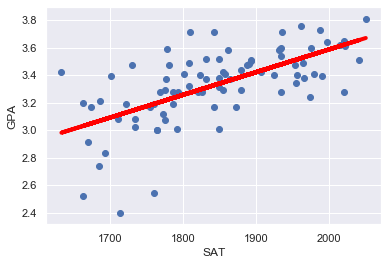

In [51]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
#yhat = 0.0017*x1 + 0.275
fig = plt.plot(x, yhat, lw=4, c='red', label='regression line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()